In [17]:
import torch
def ari(true_labels, predicted_labels):
    n = len(true_labels)
    
    contingency_matrix = torch.zeros(n, n, dtype=torch.float)

    for i in range(n):
        for j in range(n):
            contingency_matrix[i, j] = torch.sum((true_labels == i) & (predicted_labels == j)).item()
    
    a = torch.sum(contingency_matrix, dim=1)  
    b = torch.sum(contingency_matrix, dim=0) 
    n_choose_2 = n * (n - 1) / 2
    
    TP = torch.sum(contingency_matrix * (contingency_matrix - 1) / 2)
    FP = torch.sum(a * (a - 1) / 2) - TP
    FN = torch.sum(b * (b - 1) / 2) - TP
    TN = n_choose_2 - TP - FP - FN
    ARI = (TP - (FP * FN) / n_choose_2) / ((TP + (FP + FN) / 2) - (FP * FN) / n_choose_2)
    
    return ARI



In [18]:
true_labels = torch.tensor([0, 0, 1, 1, 2, 2])
predicted_labels = torch.tensor([0, 0, 2, 1, 2, 2])

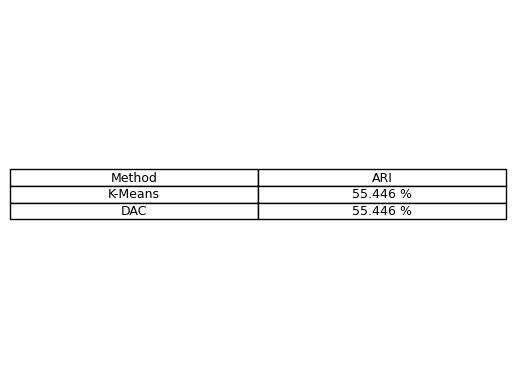

In [22]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

a = ari(true_labels, predicted_labels)
b = ari(true_labels, predicted_labels)

formatted_a = "{:.3f} %".format(a.item() * 100)
formatted_b = "{:.3f} %".format(b.item() * 100)

data = {"Method": ["K-Means", "DAC"], "ARI": [formatted_a, formatted_b]}

df = pd.DataFrame(data)
fig, ax = plt.subplots()
ax.axis("off")

table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(9)

buffer = BytesIO()
plt.savefig(buffer, format="png")
buffer.seek(0)
img = Image.open(buffer)
